In [2]:
import cv2
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
import json
import math
import warnings
import math
warnings.filterwarnings('ignore')

In [3]:
import csv

In [4]:
root_dir = '/data1/ZL_2018_HR/full/'

In [4]:
# with open('./Final ipynb files/ZL_labeled_dirs.pkl', 'rb') as f:
#     data_paths = pickle.load(f)

In [7]:
def get_dataset_name(file_name_with_dir):
    filename_without_dir = file_name_with_dir.split('/')[-1]
    return filename_without_dir

In [8]:
def get_labels(data_paths, df):
    labels = []
    dictionary = dict(zip(df['unique_id'], df['label']))
    for path in data_paths:     
        # labels
        img_file = get_dataset_name(path)
        lab = dictionary[img_file]
        labels.append(lab)
    return np.array(labels)

In [9]:
all_labels = get_labels(data_paths, df)
len(all_labels)

39206

In [10]:
def concatenate_data(data_path, df):
    data = []
    labels = []
    dictionary = dict(zip(df['unique_id'], df['label']))
    for path in data_path:     
        # data
        img_matrix = cv2.imread(path)
        img_matrix =  cv2.cvtColor(img_matrix, cv2.COLOR_BGR2RGB)
        crop_img = img_matrix[:-13,:-13]
        data.append(crop_img)
        # labels
        img_file = get_dataset_name(path)
        lab = dictionary[img_file]
        labels.append(lab)
        
        if len(data) % 1000 == 0:
            print('{} of {} samples processed'.format(len(data), len(data_paths)))
    return np.array(data), np.array(labels)

In [10]:
# data, labels = concatenate_data(data_paths, df)

Now the data and labels are created for 10,000 samples and we can make a csv file (I think).

In [ ]:
# csv_files = []
# for img in os.listdir(root_dir):
#     if img.endswith('csv'):
#         csv_files.append(img)
# csv_name = csv_files[0]

In [ ]:
# df = pd.read_csv(root_dir + csv_name, delimiter=';')

In [ ]:
# df[:2]

In [ ]:
# def get_dataset_name(file_name_with_dir):
#     filename_without_dir = file_name_with_dir.split('/')[-1]
#     return filename_without_dir

# def id_label_link(data_path):
    
#     # select csv file
#     csv_files = []
#     for img in os.listdir(data_path):
#         if img.endswith('csv'):
#             csv_files.append(img)
#     csv_name = csv_files[0]
    
#     # create df and extract nr of pos and neg
#     df = pd.read_csv(data_path + csv_name, delimiter=';')
#     positives = np.array(df['positives'])
#     negatives = np.array(df['negatives'])
    
#     # return label per sample
#     label = np.zeros(len(positives))
#     for i in range(len(label)):
#         if int(positives[i]) > int(negatives[i]):
#             label[i] = int(1)
#         else:
#             label[i] = int(0)

#     # extract the img_id from the df
#     img_id = np.array(df['uuid'])
#     img_id_tiff = []
#     for unq_id in img_id:
#         unq_id_tiff = unq_id + '_rgb_hr_2018.tiff'
#         img_id_tiff.append(unq_id_tiff)
#     img_id_tiff = np.array(img_id_tiff)

#     # link the final label to the id
#     id_label_link = []
#     for i in range(len(label)):
#         id_label_link.append((img_id_tiff[i], label[i]))
#     dict_id_label = dict(id_label_link)

#     return dict_id_label

In [ ]:
# id_label_file = open('id_and_label_ZL.csv', 'w')
# dict_id_label = id_label_link(root_dir)

In [ ]:
# len(dict_id_label)

In [ ]:
# writer = csv.writer(id_label_file)
# for the_id, label in dict_id_label.items():
#     writer.writerow([the_id, label])
    
# id_label_file.close()

### Creat csv file for balanced dataset from original csv

`count` is the number of positives in this test set

In [6]:
df['unique_id'][0]

'0b2e5667-4a81-4761-89e5-a2c64fa8ef0e_rgb_hr_2018.tiff'

In [9]:
count = 0
for i in df['label']:
    if i == 1:
        count += 1
count

2786

In [12]:
desired_nr_samples = 10000
nr_positives = int(count)
nr_negatives =int(desired_nr_samples-count)

In [13]:
print(nr_positives)
print(nr_negatives)

2786
7214


`names` are all the unique ids which we want to add to the csv file

In [19]:
names = df['unique_id']
labels = df['label']

In [20]:
print(len(names))
print(len(labels))

39206
39206


In [17]:
# names = []
# for path in data_paths:
#     unq_id = path.split('/')[-1]
#     names.append(unq_id)

In [24]:
positives = []
for index, label in enumerate(labels):
    if label == np.float(1.0):
        positives.append(index)

In [25]:
pos_ids = []
for index in positives:
    img_name = names[index]
    pos_ids.append(img_name)

In [26]:
# list of indices of the positives

print(len(positives))
print(len(pos_ids))

2786
2786


- `positives` zijn de indices van alle positieven
- `pos_ids` zijn de unique_ids van alle positieven, heb ik niet nodig als ik niet alle positieven gebruik

In [27]:
negatives = []
for index, label in enumerate(labels):
    if label == np.float(0.0):
        negatives.append(index)

In [30]:
random_negatives = random.sample(negatives, nr_negatives)

In [31]:
print(len(negatives))
print(len(random_negatives))

36420
7214


In [34]:
neg_ids = []
for index in random_negatives:
    img_name = names[index]
    neg_ids.append(img_name)

In [36]:
neg_labs = []
for i in range(len(neg_ids)):
    neg_labs.append(np.float(0.0))

In [29]:
# pos_ids = []
# for index in random_positives:
#     img_name = names[index]
#     pos_ids.append(img_name)

In [37]:
pos_labs = []
for i in range(len(pos_ids)):
    pos_labs.append(np.float(1.0))

In [38]:
id_label_link_neg = []
for i in range(len(neg_labs)):
    id_label_link_neg.append((neg_ids[i], neg_labs[i]))

In [39]:
id_label_link_pos = []
for i in range(len(pos_labs)):
    id_label_link_pos.append((pos_ids[i], pos_labs[i]))

In [40]:
import random

In [41]:
id_label_link = id_label_link_pos + id_label_link_neg
id_label_link_shuffle = random.sample(id_label_link, len(id_label_link))
dict_id_label_link = dict(id_label_link_shuffle)

In [42]:
len(dict_id_label_link)

10000

In [37]:
import csv

In [43]:
id_label_file = open('id_and_label_ZL_10000.csv', 'w')
writer = csv.writer(id_label_file)
for the_id, label in dict_id_label_link.items():
    writer.writerow([the_id, label])
    
id_label_file.close()

In [44]:
test_df = pd.read_csv('id_and_label_ZL_10000.csv', header=None)

In [45]:
test_df

0    1
0     569231b5-932e-4020-8f9d-171021761d58_rgb_hr_20...  1.0
1     5509fa49-de27-42ac-a264-52acc3fb4328_rgb_hr_20...  0.0
2     4e1da38b-eb62-40e6-be76-c4ce4b6037bf_rgb_hr_20...  0.0
3     69c5bba8-a550-4c10-bc5e-ec6a6f7f514b_rgb_hr_20...  0.0
4     1517fb8c-3211-430e-9b6b-4b1a6230fcf3_rgb_hr_20...  0.0
...                                                 ...  ...
9995  a5387e65-df51-4f74-83dc-d3060bba1597_rgb_hr_20...  0.0
9996  a50edad7-d0d2-411a-b374-02f62acdd226_rgb_hr_20...  0.0
9997  1664c34d-c0d8-4403-bde5-cfb9cf4c2111_rgb_hr_20...  0.0
9998  6dd28d66-4f63-44ee-b05c-6dd9330c1baa_rgb_hr_20...  1.0
9999  06d4ce1c-3bb1-4d2f-bead-f2d445479c08_rgb_hr_20...  0.0

[10000 rows x 2 columns]

In [46]:
import cv2
import matplotlib.pyplot as plt

In [47]:
import torch

tensor(1)


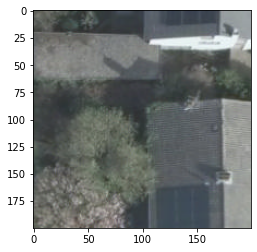

In [51]:
index = 9998
random_img = cv2.imread(root_dir + test_df.iloc[index,0])
random_img =  cv2.cvtColor(random_img, cv2.COLOR_BGR2RGB)
y_label = torch.tensor(int(test_df.iloc[index, 1]))
plt.imshow(random_img)
print(y_label)